# Permutation and the t-test

In [the idea of permutation]({{ site.baseurl }}/chapters/05/permutation_idea),
we use permutation to compare a difference between two groups of numbers.

In our case, each number corresponded to one person in the study.  The number
for each subject was the number of mosquitoes flying towards them. The subjects
were from two groups: people who had just drunk beer, and people who had just
drunk water.   There were 25 subjects who had drunk beer, and therefore, 25
numbers of mosquitoes corresponding to the "beer" group.  There were 18
subjects who had drunk water, and 18 numbers corresponding to the "water" group.

Here we repeat the permutation test, as a reminder.

As before, you can download the data from [mosquito_beer.csv]({{ site.baseurl
}}/data/mosquito_beer.csv).

See [this
page](https://github.com/matthew-brett/datasets/tree/master/mosquito_beer) for
more details on the dataset, and [the data license page]({{ site.baseurl
}}/data/license).


In [1]:
# Import Numpy library, rename as "np"
import numpy as np
# Import Pandas library, rename as "pd"
import pandas as pd

# Set up plotting
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')

Read in the data, get the numbers of mosquitoes flying towards the beer
drinkers, and towards the water drinkers, after they had drunk their beer or
water.  See the [the idea of permutation]({{ site.baseurl
}}/chapters/05/permutation_idea),

In [2]:
# Read in the data.
mosquitoes = pd.read_csv('mosquito_beer.csv')
# Select measurements after subjects had drunk beer or water.
afters = mosquitoes[mosquitoes['test'] == 'after']

We get the numbers of mosquitoes from the "beer" group.

In [3]:
# After beer rows.
beer_rows = afters[afters['group'] == 'beer']
# The 'activated' numbers for the after beer rows.
beer_activated = np.array(beer_rows['activated'])
beer_activated

array([14, 33, 27, 11, 12, 27, 26, 25, 27, 27, 22, 36, 37,  3, 23,  7, 25,
       17, 36, 31, 30, 22, 20, 29, 23])

There are 25 values in the beer group:

In [4]:
len(beer_activated)

25

We get the numbers of mosquitoes from the "water" group.

In [5]:
# Same for the water.
water_rows = afters[afters['group'] == 'water']
water_activated = np.array(water_rows['activated'])
water_activated

array([33, 23, 23, 13, 24,  8,  4, 21, 24, 21, 26, 27, 22, 21, 25, 20,  7,
        3])

We are interested in the difference between the means of these numbers:

In [6]:
observed_difference = np.mean(beer_activated) - np.mean(water_activated)
observed_difference

4.433333333333334

In the permutation test we simulate a ideal (null) world in which there is no
average difference between the numbers in the two groups.  We do this by
pooling the beer and water numbers, shuffling them, and then making fake beer
and water groups when we know, from the shuffling, that the average difference
will, in the long run, be zero.  By doing this shuffle, sample step many times
we build up the distribution of the average difference.  This is the *sampling
distribution* of the mean difference:

In [7]:
pooled = np.append(beer_activated, water_activated)
n_iters = 10000
fake_differences = np.zeros(n_iters)
for i in np.arange(n_iters):
    np.random.shuffle(pooled)
    fake_differences[i] = np.mean(pooled[:25]) - np.mean(pooled[25:])

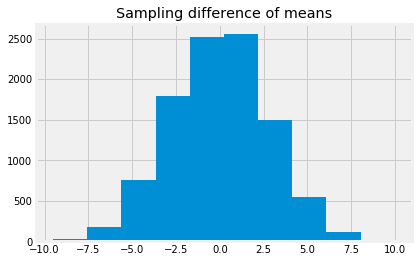

In [8]:
plt.hist(fake_differences)
plt.title('Sampling difference of means');

We can work out the proportion of the sampling distribution that is greater
than or equal to the observed value, to get an estimate of the probability of
the observed value, if we are in fact in the null (ideal) world:

In [9]:
permutation_p = np.count_nonzero(
    fake_differences >= observed_difference)/ n_iters
permutation_p

0.0539

Remember that the *standard deviation* is a measure of the spread of
a distribution.

In [10]:
sampling_sd = np.std(fake_differences)
sampling_sd

2.761098418808467

We can use the standard deviation as unit of distance in the distribution.

A way of getting an idea of how extreme the observed value is, is to ask how
many standard deviations the observed value is from the center of the
distribution, which is zero.

In [11]:
like_t = observed_difference / sampling_sd
like_t

1.605641183644047

Notice the variable name `like_t`.  This number is rather like the famous [t
statistic](https://en.wikipedia.org/wiki/T-statistic).

The difference between this `like_t` value and the *t statistic* is that the t
statistic is the observed difference divided by another *estimate* of the
standard deviation of the sampling distribution.  Specifically it is an
estimate that relies on the assumption that the `beer_activated` and
`water_activated` numbers come from a simple bell-shaped [normal
distribution](https://en.wikipedia.org/wiki/Normal_distribution).

The specific calculation relies on calculating the *prediction errors* when we
use the mean from each group as the prediction for the values in the group.

In [12]:
beer_errors = beer_activated - np.mean(beer_activated)
water_errors = water_activated - np.mean(water_activated)
all_errors = np.append(beer_errors, water_errors)

The estimate for the standard deviation of the sampling distribution follows
this formula.  The derivation of the formula is well outside the scope of the
class.

In [13]:
# The t-statistic estimate.
n1 = len(beer_activated)
n2 = len(water_activated)
n_all = n1 + n2
est_error_sd = np.sqrt(np.sum(all_errors ** 2) / (n_all - 2))
sampling_sd_estimate = est_error_sd * np.sqrt(1 / n1 + 1 / n2)
sampling_sd_estimate

2.7028390172904366

Notice that this is rather similar to the estimate we got directly from the
permutation distribution:

In [14]:
sampling_sd

2.761098418808467

The t statistic is the observed mean difference divided by the estimate of the
standard deviation of the sampling distribution.

In [15]:
t_statistic = observed_difference / sampling_sd_estimate
t_statistic

1.640250605001883

This is the same t statistic value calculated by the *independent sample t
test* routine from Scipy:

In [16]:
from scipy.stats import ttest_ind
t_result = ttest_ind(beer_activated, water_activated)
t_result.statistic

1.6402506050018828

The equivalent probability from a t test is also outside the scope of the
course, but, if the data we put into the t test is more or less compatible with
a normal distribution, then the matching p value is similar to that of the
permutation test.

In [17]:
# The "one-tailed" probability from the t-test.
t_result.pvalue / 2

0.054302080886695414

In [18]:
# The permutation p value is very similar.
permutation_p

0.0539

The permutation test has several advantages over the t test, because the t test
relies on various assumptions about the data.  The permutation test does not
rely on the assumption that the numbers come from a normal distribution.   The
permutation test is valid even for very small group sizes, even down to group
sizes of three elements, whereas the t test needs reasonably large group sizes
for its assumptions to be valid, and therefore, for its p values to be valid.